<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas as pd
import pandas as pd



**Part 1: Data Aqusition**

In [2]:
# To read the student-mat and get the DataFrame.
col_names = ['Edible_or_Poisin', 'd1', 'd2', 'cap-color', 'd3', 
                                    'odor', 'd4', 'd5', 'd6', 
                                    'gill-color', 'd7', 'd8', 'd9', 
                                    'd10', 'stalk-color-above-ring', 'stalk-color-below-ring', 'd11',
                                    'veil-color', 'd12', 'd13', 'spore-print-color',
                                    'd14', 'd15']
mushrom = "https://raw.githubusercontent.com/Danjstr/AIM-5001/master/mushroom_data"
df = pd.read_csv(mushrom, names=col_names)

**Part 2: Data Preperation**

In [3]:
# To see the head of data set
df.head(5)

,Edible_or_Poisin,d1,d2,cap-color,d3,odor,d4,d5,d6,gill-color,d7,d8,d9,d10,stalk-color-above-ring,stalk-color-below-ring,d11,veil-color,d12,d13,spore-print-color,d14,d15
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df1 = df.drop(df.columns[[1, 2, 4,6,7,8,10,11,12,13,16,18,19,21,22]], axis=1)

In [5]:
df1.head()

,Edible_or_Poisin,cap-color,odor,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,p,n,p,k,w,w,w,k
1,e,y,a,k,w,w,w,n
2,e,w,l,n,w,w,w,n
3,p,w,p,n,w,w,w,k
4,e,g,n,k,w,w,w,n


In [6]:
#print last 10 rows of the dataframe
df1.tail(10)

,Edible_or_Poisin,cap-color,odor,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
8114,p,c,m,y,c,c,w,w
8115,e,n,n,y,o,o,o,o
8116,p,n,s,b,p,w,w,w
8117,p,e,y,b,p,w,w,w
8118,p,n,f,b,p,w,w,w
8119,e,n,n,y,o,o,o,b
8120,e,n,n,y,o,o,n,b
8121,e,n,n,n,o,o,o,b
8122,p,n,y,b,w,w,w,w
8123,e,n,n,y,o,o,o,o


In [7]:
#print first 10 rows of the dataframe
df1.columns

Index(['Edible_or_Poisin', 'cap-color', 'odor', 'gill-color',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'spore-print-color'],
      dtype='object')

In [8]:
df1.shape

(8124, 8)

In [9]:
df1.dtypes

Edible_or_Poisin          object
cap-color                 object
odor                      object
gill-color                object
stalk-color-above-ring    object
stalk-color-below-ring    object
veil-color                object
spore-print-color         object
dtype: object

In [10]:
#View the description of our data. 
df1.describe()

,Edible_or_Poisin,cap-color,odor,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
count,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,10,9,12,9,9,4,9
top,e,n,n,b,w,w,w,w
freq,4208,2284,3528,1728,4464,4384,7924,2388


Show the info of the data to see if we are missing any information or need to change data types.

In [11]:
#View the info of our data. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Edible_or_Poisin        8124 non-null   object
 1   cap-color               8124 non-null   object
 2   odor                    8124 non-null   object
 3   gill-color              8124 non-null   object
 4   stalk-color-above-ring  8124 non-null   object
 5   stalk-color-below-ring  8124 non-null   object
 6   veil-color              8124 non-null   object
 7   spore-print-color       8124 non-null   object
dtypes: object(8)
memory usage: 507.9+ KB


**Part 3: Exploratory Data Analysis**

Attribute Information:

1. Edible_or_Poisin: edible = e, poison = p
2. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
3. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
4. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
5. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
6. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
7. veil-color: brown=n,orange=o,white=w,yellow=y
8. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

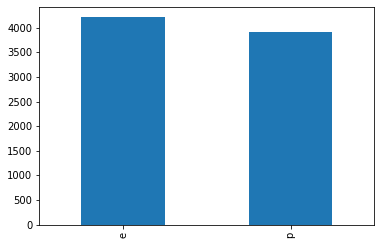

In [12]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['Edible_or_Poisin'].value_counts().plot.bar()

plt.show()

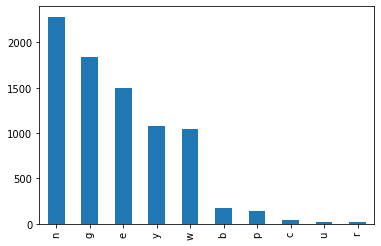

In [13]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['cap-color'].value_counts().plot.bar()

plt.show()

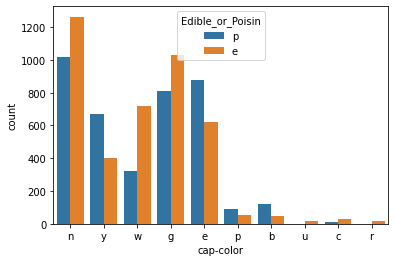

In [14]:
#class vs odor
sns.countplot(x='cap-color', hue='Edible_or_Poisin', data=df1)

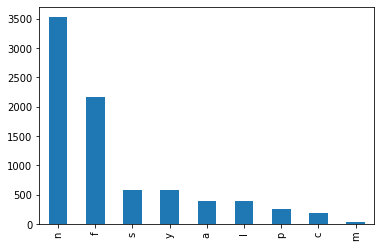

In [15]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['odor'].value_counts().plot.bar()

plt.show()

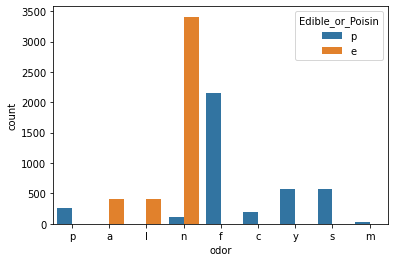

In [16]:
#class vs odor
sns.countplot(x='odor', hue='Edible_or_Poisin', data=df1)

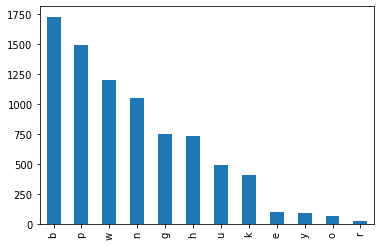

In [17]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['gill-color'].value_counts().plot.bar()

plt.show()

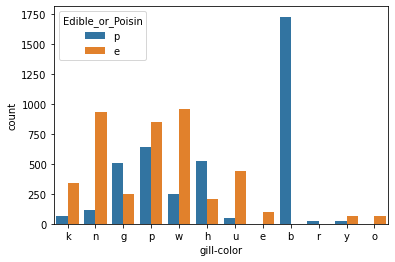

In [18]:
#class vs odor
sns.countplot(x='gill-color', hue='Edible_or_Poisin', data=df1)

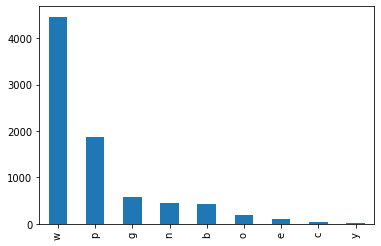

In [19]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['stalk-color-above-ring'].value_counts().plot.bar()

plt.show()

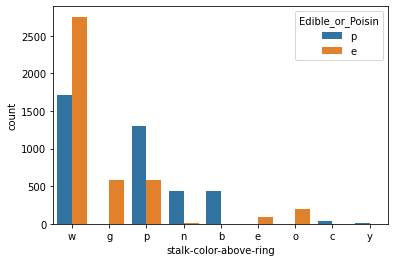

In [20]:
#class vs odor
sns.countplot(x='stalk-color-above-ring', hue='Edible_or_Poisin', data=df1)

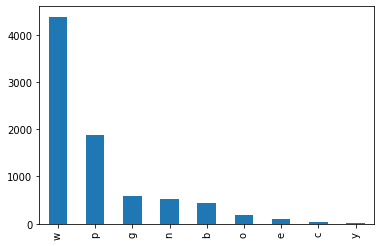

In [21]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['stalk-color-below-ring'].value_counts().plot.bar()

plt.show()

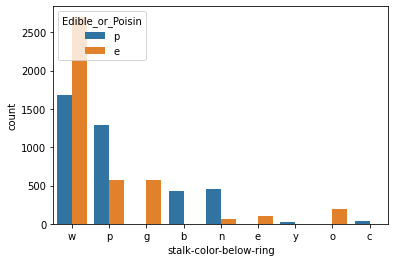

In [22]:
#class vs odor
sns.countplot(x='stalk-color-below-ring', hue='Edible_or_Poisin', data=df1)

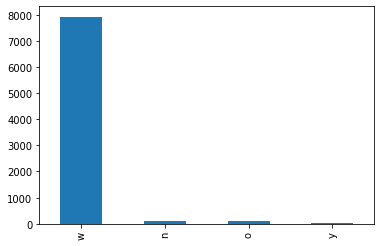

In [23]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['veil-color'].value_counts().plot.bar()

plt.show()

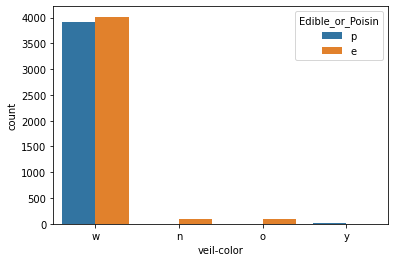

In [24]:
#class vs odor
sns.countplot(x='veil-color', hue='Edible_or_Poisin', data=df1)

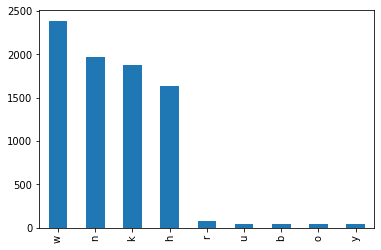

In [25]:
#Create a bar plot of the Mean over the Max Value
import matplotlib.pyplot as plt
import seaborn as sns
df1['spore-print-color'].value_counts().plot.bar()

plt.show()

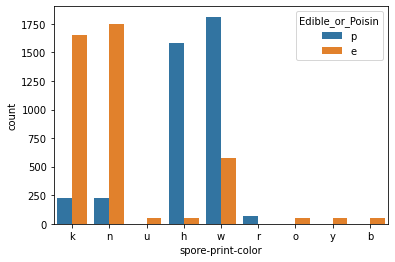

In [26]:
#class vs odor
sns.countplot(x='spore-print-color', hue='Edible_or_Poisin', data=df1)

In [27]:
df1.head()

,Edible_or_Poisin,cap-color,odor,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,p,n,p,k,w,w,w,k
1,e,y,a,k,w,w,w,n
2,e,w,l,n,w,w,w,n
3,p,w,p,n,w,w,w,k
4,e,g,n,k,w,w,w,n


In [28]:
# To convert the "e/p" to e = 0, p = 1
class_mapping = {'e':0,'p':1}
df1['Edible_or_Poisin'] = df1['Edible_or_Poisin'].map(class_mapping)
df1.head()

,Edible_or_Poisin,cap-color,odor,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,1,n,p,k,w,w,w,k
1,0,y,a,k,w,w,w,n
2,0,w,l,n,w,w,w,n
3,1,w,p,n,w,w,w,k
4,0,g,n,k,w,w,w,n


In [29]:
df2=pd.get_dummies(df1)
df2

,Edible_or_Poisin,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8120,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8122,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


**Part 4: Build Predictive Models**

In [30]:
#check the null error percent
df1['Edible_or_Poisin'].values.sum()/df1.shape[0]

0.48202855736090594